 ### Постановка задачи.

В компании SkyCrossroads запущена рекламная акция:

Клиент может получить дополнительные баллы лояльности за покупку, совершенную в течение ограниченного периода.

Классическая акция подразумевает получение дополнительных 1000 баллов лояльности за покупку от 100 рублей. 

Было решено запустить АБ Тест, в котором в тестовой группе предлагается в два раза больше баллов лояльности за покупку от 100 рублей. 

Эксперимент был проведен в нескольких торговых точках, которые в датасете представлены столбцом id_point. Также в датасете есть информация о том, как долго клиент зарегистрирован у нас в программе лояльности.

Вам поступил запрос от отдела маркетинга:

- Рассчитать результаты эксперимента в целом и в отдельности по каждой торговой точке
- Вынести решение об эффективности воздействия Б по сравнению с воздействием А
- Сделать сегментацию пользователей с точки зрения длительности регистрации в программе лояльности


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as spst

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Часть 1. Создание статистических функций

Расшифровка данных
    id_client - уникальный id клиента
    id_group- контроль (1000 баллов лояльности) / тест (2000 баллов лояльности)
    sum_pay - сумма, на которую была совершена покупка
    id_point - id торговой точки
    months_reg - длительность регистрации клиента в программе лояльности

In [5]:
df = pd.read_csv('Dataset_AB_TEST.csv', sep = ';')
df

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10976 non-null  int64  
 1   id_group    10902 non-null  object 
 2   sum_pay     10849 non-null  float64
 3   id_point    10895 non-null  float64
 4   months_reg  10976 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 428.9+ KB


### Задача 1

Постройте в Python функцию statistical_analysis, которая будет проводить анализ выборки. 
На вход она берет:
- один ряд r в формате «список» (list) или «кортеж» (tuple). Это ряд, который необходимо исследовать.
- один ряд q в формате «список» (list). Это ряд квантильных порогов, для которых необходимо вычислить квантильные значения ряда r. Аргумент q должен иметь значение по умолчанию q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9] (но при желании значение ряда q можно было бы заменить)

И делает следующие шаги:

1. Проводит проверку на тип данных ряда : если тип данных ряда r не «список» (list) или «кортеж» (tuple), то выводит ошибку «Нужен список или кортеж!»  
2. Проводит проверку на длину ряда r: если в нём 4 наблюдения или меньше, то выдает ошибку «Требуется более длинный ряд».
3. Проводит преобразование типа данных «список» (list) или «кортеж» (tuple) в тип данных Series (pandas).
4. Для ряда выводит (с помощью print и расшифровки) среднее (метод Series “mean”), дисперсию (метод Series “var”), стандартное отклонение (метод Series “std”).
    
Также записывает эти значения во внутренние переменные и возвращает эти переменные в return.
    
5. С помощью функции quantile из библиотеки numpy функция рассчитывает и записывает в отдельную переменную qs список из квантилей, соответствующих квантильным порогам из q. 
    
    Можно прочитать документацию функции quantile: [https://numpy.org/doc/stable/reference/generated/numpy.quantile.html](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)
    
    Ряд qs также должен быть в return функции (вместе со средним, дисперсией и стандартным отклонением из пункта-4).
    
6. Оформляет принт результатов квантильного анализа. Для этого необходимо проверить, есть ли среди указанных в аргументе квантильных порогов те, что соответствуют медиане, квартилям или децилям. Если такие квантильные пороги есть, то для каждого из них оформите print с указанием квантильного порога и его значения.
7. Для ряда функция statistical_analysis строит гистограмму с помощью библиотеки seaborn.

Построим функцию распределения и применим ее к выборке:

In [7]:
q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]
def statistical_analysis (r, q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):
    if type(r) != (list or tuple):
        print ('Нужен список или кортеж!')
    elif len(r) <= 4:
        print ('Требуется более длинный ряд.')
    else:
        rs = pd.Series(r)
        rs_mean = rs.mean()
        rs_var = rs.var()
        rs_std = rs.std()
        print ('Среднее значение -', round(rs_mean, 2))
        print ('Диспресия значений - ', round(rs_var, 2))
        print ('Стандартное отклонение значений - ', round(rs_std, 2))
        qs = np.quantile(r,q)
        for i in q:
            print ('Квантиль ', int(i*100), '% - ', np.quantile(r, i))
        sns.histplot(data=r, color = 'yellowgreen')
        return rs_mean, rs_var, rs_std, qs
    

Среднее значение - 3568.75
Диспресия значений -  8568292.5
Стандартное отклонение значений -  2927.16
Квантиль  10 % -  410.0
Квантиль  25 % -  1251.0
Квантиль  30 % -  1590.4
Квантиль  40 % -  2331.0
Квантиль  50 % -  3173.0
Квантиль  60 % -  3934.0
Квантиль  75 % -  5358.0
Квантиль  90 % -  7088.4000000000015


(3568.751036961932,
 8568292.495626044,
 2927.164582941322,
 array([ 410. , 1251. , 1590.4, 2331. , 3173. , 3934. , 5358. , 7088.4]))

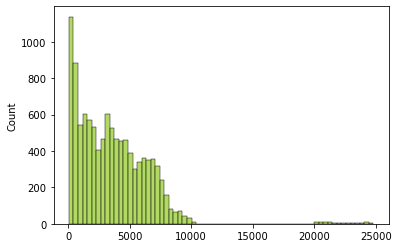

In [8]:
ran = list(df['sum_pay'].dropna())
statistical_analysis(ran, q)


На графике видно, что полученный график распределения смещен влево, а в правой части несколько значений, заметно отличающихся от основной часть распределения. Это выбросы, которые для дальнейшего анализа следует удалить для получения наиболее корректных результатов анализа.

### Задача 2

Постройте в Python функцию test_calc, которая будет проводить t-тест на равенство средних двух выборок. 
На вход она берет:
- Ряд 1 (r1)
- Ряд 2 (r2)
- Уровень значимости alpha (имеет дефолтное значение = 5%)
И делает следующие шаги:
1. Вычисляет значение t-критерия и его p_value по сравнению средних значений рядов r1 и r2.
Лучше всего воспользоваться функцией ttest_ind из библиотеки scipy.stats.
Эти значения сохраняются во внутренние переменные (значение t-критерия в переменную s, p_value в переменную p).
2. Возвращает (return) переменные s и p.
3. Оформляет принт результатов, принимается ли нулевая гипотеза о равенстве средних или нет на основании сравнения полученного p_value (переменная р) и аргумента alpha.

In [9]:
def test_calc (r1, r2, alpha = 0.05):
    s, p = spst.ttest_ind(r1, r2)
    if p > alpha:
        print('Нулевая гипотеза принимается')
    else:
        print('Нулевая гипотеза не принимается')
    print ('t-критерий = ', s)   
    print ('p-value = ', p)

In [10]:
test_calc(df['sum_pay'].dropna(), df['months_reg'].dropna())

Нулевая гипотеза не принимается
t-критерий =  127.56059540922202
p-value =  0.0


### Задача 3

Постройте в Python функцию mann_whitney_func, которая будет проводить тест Манна-Уитни для двух выборок.

На вход она берет:

- Ряд 1 (r1)
- Ряд 2 (r2)
- Уровень значимости alpha (имеет дефолтное значение = 5%)

И делает следующие шаги:

1. Вычисляет значение статистики Манна — Уитни и p_value нулевой гипотезы теста Манна-Уитни. Значение статистики записывается во внутреннюю переменную s, а p_value - во внутреннюю переменную p.
2. Принт результата в зависимости от соотношения p_value и alpha («Распределения (не) равны»).
3. Возвращает (в *return*) — внутренние переменные s и p.

In [11]:
def mann_whitney_func (r1, r2, alpha = 0.05):
    s, p = spst.mannwhitneyu(r1, r2)
    s = round(s, 2)
    p = round(p, 6)
    if p > alpha:
        print ('Распределения равны.')
    else:
        print ('Распределения не равны.') 
    return s, p

In [12]:
mann_whitney_func (df['sum_pay'].dropna(), df['months_reg'].dropna())

Распределения не равны.


(119078624.0, 0.0)

_______

## Часть 2. Расчет A/B теста

### Задача 1

**Проведите общий анализ A/B Теста**

1. С помощью функции *read-csv* импортните csv файл с датасетом.
2. Исследуйте данные. Проведите очистку данных от нуллов и выбросов (для очистки от выбросов  используйте созданную в первом шаге функцию ***statistical_analysis***).
3. Создайте функцию для визуализации ***show_hist***, которая имеет следующие аргументы:
    - ***r1*** (первый ряд для визуализации)
    - ***r2*** (второй ряд для визуализации)
    - ***graph_titile*** (Строка-название графика)
    - ***xlabel*** (подпись оси Х с дефолтным значением “*Размер платежа*”)
    - ***ylabel*** (подпись оси Y с дефолтным значением “*Кол-во людей*”)
    
    Функция должна с помощью библиотеки ***seaborn*** строить гистограмму для каждого из рядов (вместе на одном графике) и подписывать график (***graph_titile)*** и оси ***(xlabel, ylabel)***.
    
4. Проведите визуализацию с помощью функции ***show_hist*** для сравнения результатов в А и В группе.
5. Посмотрите на результаты параметрического и непараметрического теста (используйте созданные в первой шаге функции ***mann_whitney_func*** и ***test_calc***).
6. Сделайте выводы.

Подготовим данные к анализу. Для начала проверим, сколько нулевых значений в каждом столбце:

In [13]:
df.isna().sum()

id_client       0
id_group       74
sum_pay       127
id_point       81
months_reg      0
dtype: int64

Проверим, сколько строк потеряем, если выбросим из датасета все строки с нулевыми значениями:

In [14]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10840 non-null  int64  
 1   id_group    10840 non-null  object 
 2   sum_pay     10840 non-null  float64
 3   id_point    10840 non-null  float64
 4   months_reg  10840 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 508.1+ KB


В процентах это:

In [15]:
(10976-10840)*100/10976

1.239067055393586

Меньше 5%, это допустимо, однако, чтобы не допустить удаления нулевых покупок, удалим только строки с NaN по столбцам id_group и id_point 

In [16]:
df_clear = df.dropna(subset=['id_group', 'id_point'])

In [17]:
df_clear.isna().sum()

id_client      0
id_group       0
sum_pay       54
id_point       0
months_reg     0
dtype: int64

Оставшиеся NaN из столбца sum_pay заполним нулями:

In [18]:
df_clear = df_clear.fillna(0)

In [19]:
df_clear.isna().sum()

id_client     0
id_group      0
sum_pay       0
id_point      0
months_reg    0
dtype: int64

In [20]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10894 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10894 non-null  int64  
 1   id_group    10894 non-null  object 
 2   sum_pay     10894 non-null  float64
 3   id_point    10894 non-null  float64
 4   months_reg  10894 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 510.7+ KB


Теперь проверим на наличие выбросов по столбцу суммы платежа, квантиль 99%:

Среднее значение - 3551.07
Диспресия значений -  8589277.6
Стандартное отклонение значений -  2930.75
Квантиль  99 % -  9801.119999999995


(3551.0682026803747, 8589277.602894131, 2930.746936003539, array([9801.12]))

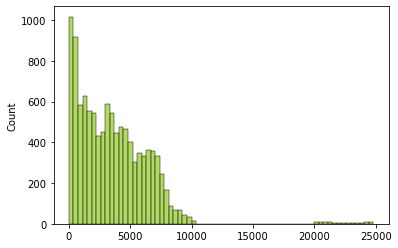

In [21]:
q=[0.99]
statistical_analysis(list(df_clear['sum_pay']), q)

И по столбцу количества месяцев регистрации, квантиль также 99%:

Среднее значение - 4.7
Диспресия значений -  10.1
Стандартное отклонение значений -  3.18
Квантиль  99 % -  13.0


(4.702037818982927, 10.101791495494448, 3.1783315584586904, array([13.]))

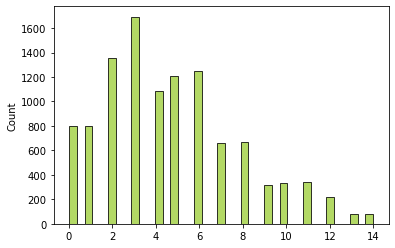

In [22]:
q=[0.99]
statistical_analysis(list(df_clear['months_reg']), q)

Попробуем удалить 1% выбросов по сумме платежей:

In [23]:
df_clear.loc[df_clear['sum_pay'] < 9801.119999999995].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10785 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10785 non-null  int64  
 1   id_group    10785 non-null  object 
 2   sum_pay     10785 non-null  float64
 3   id_point    10785 non-null  float64
 4   months_reg  10785 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 505.5+ KB


Тогда общий процент удаленных строк будет равен:

In [24]:
(10976-10731)*100/10976

2.232142857142857

Допустимо, удаляем и смотрим, сколько получится выбросить по стоблцу с количеством месяцев регистрации:

In [25]:
df_clear = df_clear.loc[df_clear['sum_pay'] < 9801.119999999995]

In [26]:
df_clear.loc[df_clear['months_reg'] < 13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10623 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10623 non-null  int64  
 1   id_group    10623 non-null  object 
 2   sum_pay     10623 non-null  float64
 3   id_point    10623 non-null  float64
 4   months_reg  10623 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 498.0+ KB


In [27]:
(10976-10623)*100/10976

3.2161078717201166

Итого общая потеря строк составляет менее 5%, это допустимо, можно удалить и выбросы по количеству месяцев регистрации, удаляем.

In [28]:
df_clear = df_clear.loc[df_clear['months_reg'] < 13]

Удостоверимся на графиках, что выбросов теперь действительно нет:

In [103]:
import matplotlib.pyplot as plt

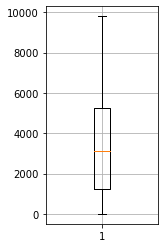

In [30]:
plt.figure(figsize = (2, 4))
plt.boxplot(df_clear['sum_pay'])
plt.grid()
plt.show()

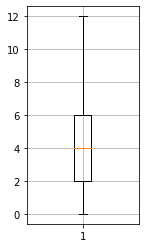

In [31]:
plt.figure(figsize = (2, 4))
plt.boxplot(df_clear['months_reg'])
plt.grid()
plt.show()

Датасет готов к анализу. Построим график распределения платежей по сумме в тестовой и контрольной группе:

In [38]:
graph_title = 'График распределения размера платежа'
def show_hist(x, graph_title = 'График распределения размера платежа'):
    r1 = x[x['id_group']=='test']['sum_pay']
    r2 = x[x['id_group']=='control']['sum_pay']
    plt.figure(figsize = (8, 4))
    plt.title(graph_title)
    plt.xlabel ('Размер платежа')
    plt.ylabel ('Кол-во людей')
    ax1 = sns.histplot(r1, color='lightcoral', label = 'test', legend = True)
    plt.axvline(x=r1.mean(), ls = '--', c = 'lightcoral')
    ax2 = sns.histplot(r2, color='lightskyblue', label = 'control', legend = True)
    plt.axvline(x=r2.mean(), ls = '--', c = 'lightskyblue')
    plt.legend()

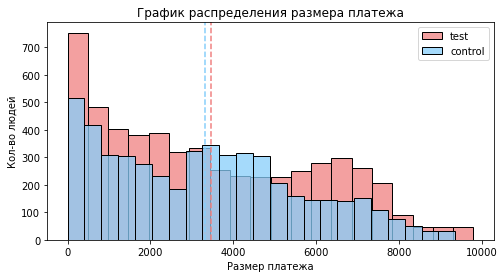

In [39]:
x = df_clear
show_hist(x)

Визуальная оценка: количественные различия есть, но в целом распределения выглядят одинаково. Проверим с помощью тестов:

In [40]:
r1 = df_clear[df_clear['id_group']=='test']['sum_pay']
r2 = df_clear[df_clear['id_group']=='control']['sum_pay']
test_calc(r1, r2)

Нулевая гипотеза не принимается
t-критерий =  2.8688730167774565
p-value =  0.004127493108471625


In [41]:
mann_whitney_func (r1, r2)

Распределения равны.


(14293618.5, 0.17683)

Вывод: между тестовой и контрольной группами есть различия в средних, а распределения действительно одинаковые.

### Задача 2

**Анализ по торговым точкам**

1. Создайте цикл, пробегающий по всем уникальным торговым точкам.
2. Для каждой торговой точки проведите визуализацию с помощью гистограммы для сравнения результатов в А и В группе (используйте функцию ***show_hist).***
3. Для каждой торговой точки посмотрите на результаты параметрического и непараметрического теста для сравнения групп А и В (используйте функции ***mann_whitney_func*** и ***test_calc***).
4. Убедитесь, что в торговых точках, по которым вы делаете выводы, достаточное количество наблюдений.
5. Для каждой торговой точки с достаточным количеством наблюдений сделайте выводы.

In [42]:
df_clear.head()

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
5,1371160,test,218.0,1179.0,5


Создадим список уникальных торговых точек:

In [43]:
tt = set(df_clear['id_point'])
tt

{1178.0, 1179.0, 1182.0, 1186.0, 1188.0, 1199.0}

Напишем функцию, которая будет вызывать ранее написанную функцию для построения графиков распределения:

In [44]:
def tt_analysis (y):
    for i in tt:
        x = y[y['id_point']==i]
        graph_title = 'График распределения платежей торговой точки '+str(i)
        show_hist(x, graph_title)

Применим построенную функцию к датасету, чтобы получить распределение платежей в контрольной и тестовой группе в каждой торговой точке:

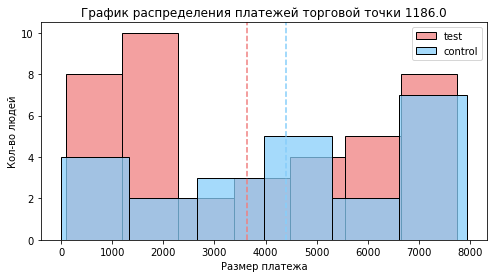

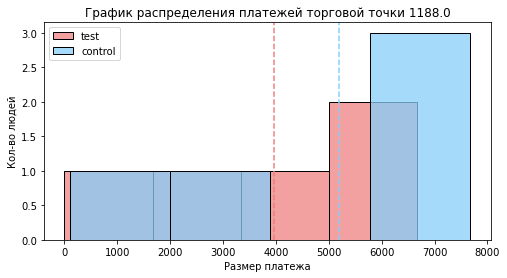

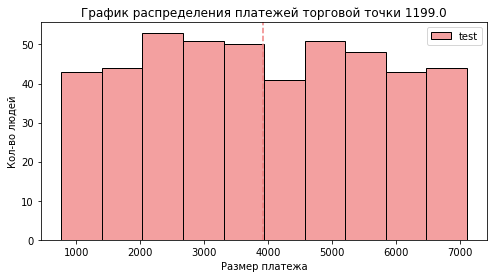

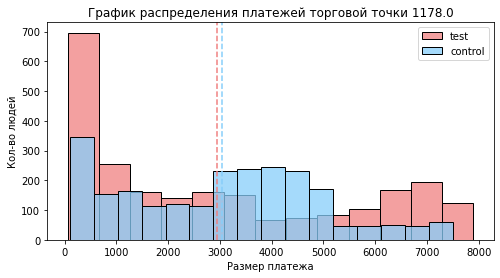

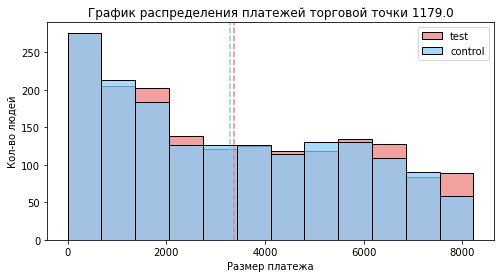

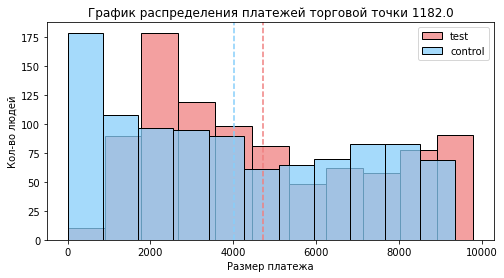

In [45]:
tt_analysis (df_clear)

На графиках видно, что количество наблюдений по двум торговым точкам очень маленькое, а по одной полностью отсутствует контрольная группа. Проверим группировкой датасета:

In [46]:
df_clear.groupby(['id_point', 'id_group'])['id_client'].count()

id_point  id_group
1178.0    control     2372
          test        2369
1179.0    control     1685
          test        1742
1182.0    control     1000
          test         914
1186.0    control       23
          test          40
1188.0    control        5
          test           5
1199.0    test         468
Name: id_client, dtype: int64

In [91]:
df_clear.groupby(['id_point'])['id_client'].count()

id_point
1178.0    4741
1179.0    3427
1182.0    1914
1186.0      63
1188.0      10
1199.0     468
Name: id_client, dtype: int64

Действительно, по тт 1188 общее количество наблюдений меньше 10, а по тт 1199 проведение дальнейшего анализа не имеет смысла, тк отсутсвуют данные по контрольной группе. По остальным точкам можно провести t-тест и тест Манна-Уитни для определения различий в тестовых и контрольных группах.

Удалим тт 1199 из списка торговых точек и проведем t-тест и тест Манна-Уитни на оставшихся:

In [47]:
tt.remove(1199)

In [48]:
def tt_test (x):
    for i in tt:
        df_i = x[x['id_point']==i]
        r1_i = df_i[df_i['id_group']=='test']['sum_pay']
        r2_i = df_i[df_i['id_group']=='control']['sum_pay']
        print('\n'+'ТТ '+str(i))
        test_calc(r1_i, r2_i)

In [49]:
tt_test (df_clear)


ТТ 1186.0
Нулевая гипотеза принимается
t-критерий =  -1.1180842901798607
p-value =  0.26791503165699326

ТТ 1188.0
Нулевая гипотеза принимается
t-критерий =  -0.6442275987087498
p-value =  0.5374567675930649

ТТ 1178.0
Нулевая гипотеза принимается
t-критерий =  -1.5784492225854414
p-value =  0.11452918678531801

ТТ 1179.0
Нулевая гипотеза принимается
t-критерий =  1.1235375532337082
p-value =  0.2612880047982933

ТТ 1182.0
Нулевая гипотеза не принимается
t-критерий =  5.520250582420917
p-value =  3.8472165942044545e-08


In [50]:
def tt_mann_whitney (x):
    for i in tt:
        df_i = x[x['id_point']==i]
        r1_i = df_i[df_i['id_group']=='test']['sum_pay']
        r2_i = df_i[df_i['id_group']=='control']['sum_pay']
        print('\n'+'ТТ '+str(i))
        mann_whitney_func (r1_i, r2_i)

In [51]:
tt_mann_whitney (df_clear)


ТТ 1186.0
Распределения равны.

ТТ 1188.0
Распределения равны.

ТТ 1178.0
Распределения не равны.

ТТ 1179.0
Распределения равны.

ТТ 1182.0
Распределения не равны.


Также мы видим, что в двух торговых точках - 1186 и 1188 - количество наблюдений очень маленькое по сравнению с остальными. Для оценки достаточности такого количества наблюдений вычислим необходимое количество наблюдений для теста с мощность 80% на основе данных по торговой точке 1182 (т.к. именнов этой тт мы видим отличия контрольной и тестовой группы по двум тестам).

In [52]:
import statsmodels.stats.power as smp

In [53]:
chipower = smp.GofChisquarePower()

In [54]:
df1182 =  df_clear.loc[df_clear['id_point'] == 1182]

Для вычисления количества наблюдений в качестве effect size взят показатель Коэна. Делаем предварительные рассчеты:

Вычисляем средние:

In [55]:
mc = df1182[df1182['id_group']=='control']['sum_pay'].mean()
mt = df1182[df1182['id_group']=='test']['sum_pay'].mean()
mc, mt

(4028.936, 4726.797592997812)

Стандартные отклонения:

In [56]:
sc = df1182[df1182['id_group']=='control']['sum_pay'].std()
st = df1182[df1182['id_group']=='test']['sum_pay'].std()
sc, st

(2837.242393646393, 2678.470767286807)

И еще раз, вынеся в отдельные переменные, вычислим количество наблюдений:

In [57]:
nc = df1182[df1182['id_group']=='control']['sum_pay'].count()
nt = df1182[df1182['id_group']=='test']['sum_pay'].count()
nc, nt

(1000, 914)

Теперь вычислим объединенное стандартное отклонение:

In [58]:
s_pooled = np.sqrt(((nc-1)*(sc**2) + (nt-1)*(st**2))/(nc+nt-2))
s_pooled

2762.565833996468

И на основе него показатель Коэна:

In [59]:
d = (mt-mc)/s_pooled
d

0.2526135610633575

Размер эффекта:

In [60]:
effect_size = d/np.sqrt(d**2+4)
effect_size

0.12531116592658673

Теперь, имея все вводные, вычислим необходимое количество наблюдений:

In [61]:
chipower.solve_power(effect_size, nobs = None, alpha = 0.05, power = 0.8)

499.8354669831771

Итак, для того, чтобы в наблюдениях получить результат не менее заметный, чем в тогровой точке 1182, необходимо брать не менее 500 наблюдений.

В тт 1186 и 1188 количество наблюдений у нас 63 и 10 соответственно. Такое количество наблюдений слишком мало, из дальнейшего анализа эти тт можно исключить.

Итого для анализа остаются торговые точки 1178, 1179, 1182

In [62]:
df_clear_tt = df_clear.loc[df_clear.id_point.isin ((1178, 1179, 1182))]

In [63]:
set(df_clear_tt['id_point'])

{1178.0, 1179.0, 1182.0}

### Выводы:

ТТ 1178 - средние значения в контрольной и тестовой группах не отличаются, но распределения по сумме платежей не равны; 

ТТ 1179 - отличий в тестовой и контрольной группе нет;

ТТ 1182 - в тестовой и контрольной группе есть статистически значимые различия как по среднему, так и по распределению сумм платежей.

_________________

## Часть 3. Сегментация и презентация

### Задача 1

**Сегментация по длительности регистрации**

1. Рассмотрите два вида корреляции между выплаченной суммой и длительностью регистрации (корреляция Спирмена и корреляция Пирсона).
2. Постройте *scatterplot* (из библиотеки *seaborn*) для визуализации связи между переменными
3. Как полученные результаты повлияют на ваши бизнес-рекомендации?

### Задача 2

**Презентация и сторителлинг**

1. Оформите презентацию (5-8 слайдов), в которой вы излагаете рекомендации для вышестоящего руководства. Постарайтесь избегать в презентации специфических терминов (таких как корреляция, тест Манна-Уитни т.д.)

Рассчитаем корреляцию Пирсона и Спирмена, чтобы определить существует ли зависимость между суммой оплат и длительностью регистрации в программе лояльности:

In [64]:
spst.stats.pearsonr(df_clear_tt['sum_pay'], df_clear_tt['months_reg'])

(0.6420992132057955, 0.0)

In [65]:
spst.stats.spearmanr(df_clear_tt['sum_pay'], df_clear_tt['months_reg'])

SpearmanrResult(correlation=0.6682112933804218, pvalue=0.0)

Вычисление коэффициентов корреляции Пирсона и Спирмена дают практически одинаковый результат: корреляция между длительностью регистрации и оплаченной суммой корреляция положительная средней силы (0,3 < corr < 0.7).

Для наглядности отобразим распределение платежей в зависимости от месяцев регистрации на графике:

<AxesSubplot:xlabel='months_reg', ylabel='sum_pay'>

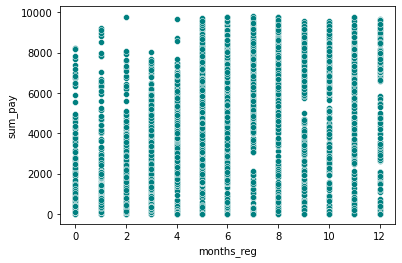

In [104]:
x = df_clear_tt['months_reg']
y = df_clear_tt['sum_pay']
sns.scatterplot(x, y, color = 'teal')

На первый взгляд, никаких заметных тенденций в этом распределении нет, кроме того, что люди, зарегистрированные менее 5 месяцев, менее склонны к покупкам больше 8000. Но если уменьшить плотность отображения точек на графике, то результат будет несколько иной:

In [105]:
df_clear_tt.groupby('months_reg')['id_client'].count()

months_reg
0      779
1      765
2     1292
3     1600
4     1000
5     1117
6     1175
7      604
8      629
9      291
10     303
11     320
12     207
Name: id_client, dtype: int64

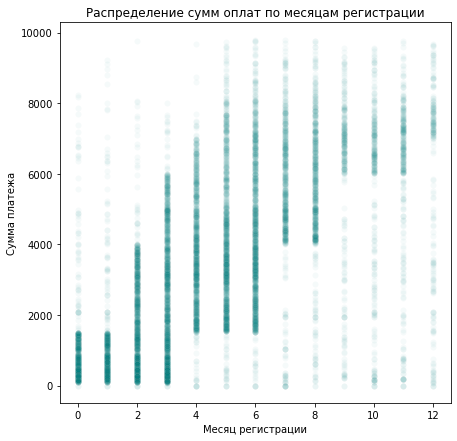

In [119]:
x = df_clear_tt['months_reg']
y = df_clear_tt['sum_pay']
plt.figure(figsize=(7,7))
ax = sns.scatterplot(x, y, color = 'teal', alpha = 0.04)
ax.set(title='Распределение сумм оплат по месяцам регистрации')
ax.set_ylabel(ylabel = 'Сумма платежа')
ax.set_xlabel ('Месяц регистрации')
plt.show()

На этом графике уже видно, что корреляция действительно существует, но после достижения длительности регистрации в 7 месяцев суммы оплат не увеличиваются вместе с увеличением срока регистрации, основная часть оплат остается на уровне 6000-8000.

Для сравнения результатов А/Б-теста в тестовой и контрольной группе сделаем сегментацию покупателей по длительности регистрации и применим все ранее использованные методы анализа - распределение сумм платежей, t-критерий и критерий Манна-Уитни. 

Итак, у нас существуют следующие сегменты по длительности регистрации:

In [69]:
mm = set(df_clear_tt['months_reg'])
mm

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

Посмотрим на распределение платежей по тестовой и контрольной группе в каждом сегменте:

In [70]:
def mm_analysis (y):
    for m in mm:
        x = y[y['months_reg']==m]
        graph_title = 'График распределения платежей '+str(m)+' месяца регистрации'
        show_hist(x, graph_title)

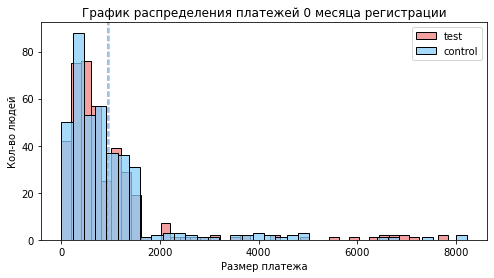

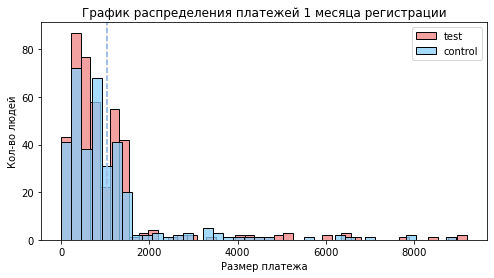

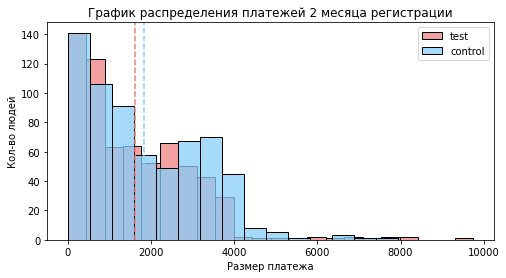

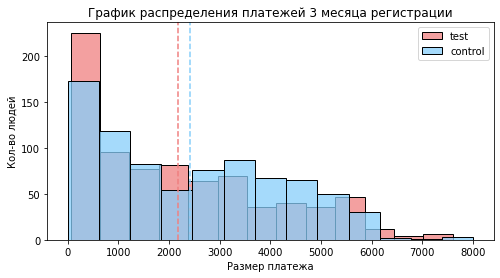

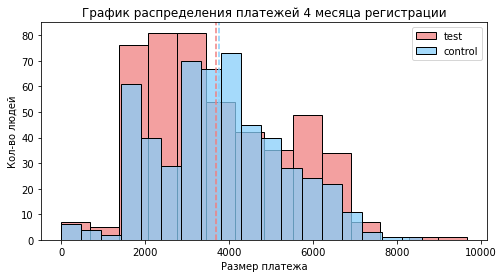

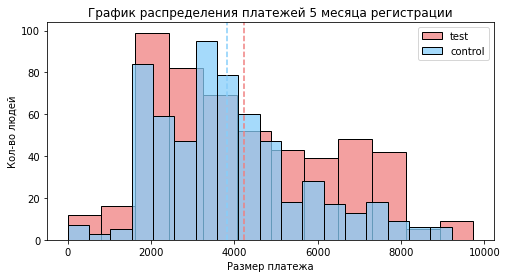

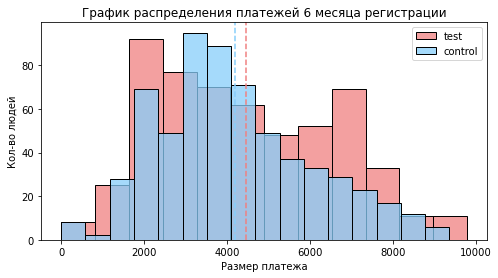

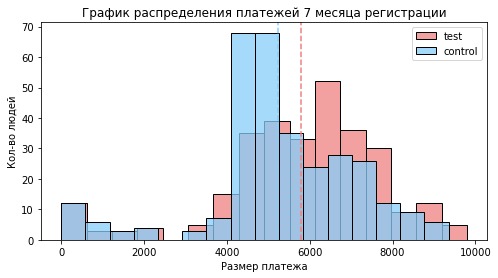

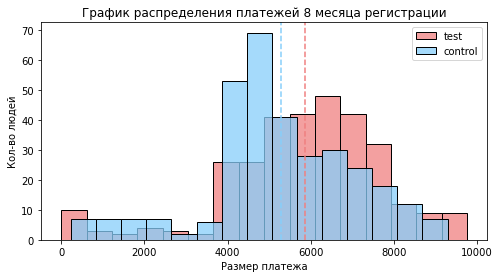

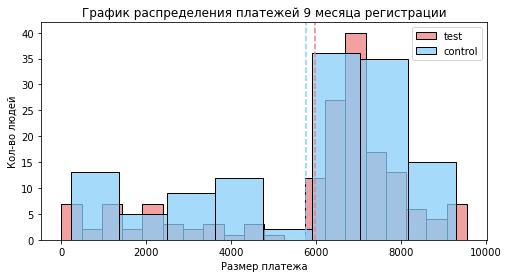

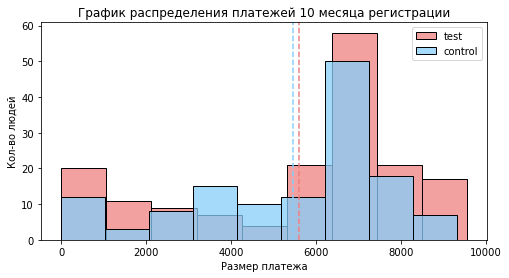

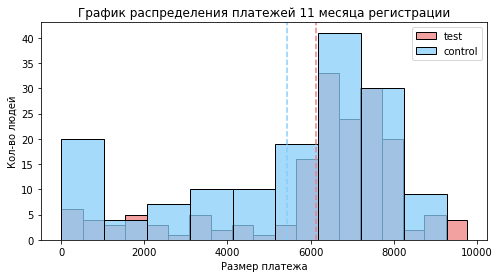

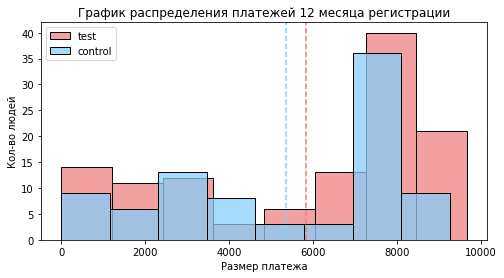

In [71]:
mm_analysis (df_clear_tt)

На графиках видно, что с увеличением срока регистрации суммы оплат смещаются в бОльшую сторону.

Посмотрим на t-критерий и критерий Манна-Уитни, чтобы определить, насколько проведение акции повлияло на покупки в сегментах:

In [72]:
def mm_test (x):
    for m in mm:
        df_i = x[x['months_reg']==m]
        r1_i = df_i[df_i['id_group']=='test']['sum_pay']
        r2_i = df_i[df_i['id_group']=='control']['sum_pay']
        print('\n'+str(m) +' месяц регистрации')
        test_calc(r1_i, r2_i)

In [73]:
mm_test (df_clear_tt)


0 месяц регистрации
Нулевая гипотеза принимается
t-критерий =  -0.21285137037071858
p-value =  0.8314987240598354

1 месяц регистрации
Нулевая гипотеза принимается
t-критерий =  -0.03206752298200119
p-value =  0.9744265893336539

2 месяц регистрации
Нулевая гипотеза не принимается
t-критерий =  -2.8964530760587897
p-value =  0.00383773433717796

3 месяц регистрации
Нулевая гипотеза не принимается
t-критерий =  -2.5565035644510274
p-value =  0.010664750971566973

4 месяц регистрации
Нулевая гипотеза принимается
t-критерий =  -0.634316362076552
p-value =  0.5260197476600286

5 месяц регистрации
Нулевая гипотеза не принимается
t-критерий =  3.443529351524711
p-value =  0.0005954971186347937

6 месяц регистрации
Нулевая гипотеза не принимается
t-критерий =  2.2999099724111915
p-value =  0.021628237536327057

7 месяц регистрации
Нулевая гипотеза не принимается
t-критерий =  3.5502586208582443
p-value =  0.0004149016677145306

8 месяц регистрации
Нулевая гипотеза не принимается
t-критерий =

In [74]:
def mm_mann_whitney (x):
    for m in mm:
        df_i = x[x['months_reg']==m]
        r1_i = df_i[df_i['id_group']=='test']['sum_pay']
        r2_i = df_i[df_i['id_group']=='control']['sum_pay']
        print('\n'+str(m) +' месяц регистрации')
        mann_whitney_func (r1_i, r2_i)

In [75]:
mm_mann_whitney (df_clear_tt)


0 месяц регистрации
Распределения равны.

1 месяц регистрации
Распределения равны.

2 месяц регистрации
Распределения не равны.

3 месяц регистрации
Распределения не равны.

4 месяц регистрации
Распределения равны.

5 месяц регистрации
Распределения не равны.

6 месяц регистрации
Распределения равны.

7 месяц регистрации
Распределения не равны.

8 месяц регистрации
Распределения не равны.

9 месяц регистрации
Распределения равны.

10 месяц регистрации
Распределения равны.

11 месяц регистрации
Распределения не равны.

12 месяц регистрации
Распределения равны.


При сегментации по месяцам получили следующие результаты для контрольной и тестовой групп:

0 месяц - нулевая гипотеза принимается, распределения равны

1 месяц - нулевая гипотеза принимается, распределения равны.

2 месяц - нулевая гипотеза не принимается (t-критерий =  -2.9, p-value =  0.0038), распределения не равны.

3 месяц - нулевая гипотеза не принимается (t-критерий =  -2.6, p-value =  0.01), распределения не равны.

4 месяц - нулевая гипотеза принимается, распределения равны.

5 месяц - нулевая гипотеза не принимается (t-критерий =  3.4, p-value =  0.0006), распределения не равны.

6 месяц - нулевая гипотеза не принимается (t-критерий =  2.3, p-value =  0.02), распределения равны.

7 месяц - нулевая гипотеза не принимается (t-критерий =  3.5, p-value =  0.0004), распределения не равны.

8 месяц - нулевая гипотеза не принимается (t-критерий =  3.8, p-value =  0.0001), распределения не равны.

9 месяц - нулевая гипотеза принимается, распределения равны.

10 месяц - нулевая гипотеза принимается, распределения равны.

11 месяц - нулевая гипотеза не принимается (t-критерий =  2.6, p-value =  0.00097), распределения не равны.

12 месяц - нулевая гипотеза принимается, распределения равны.

In [90]:
df_clear_tt.groupby(['months_reg'])['id_client'].count()

months_reg
0      779
1      765
2     1292
3     1600
4     1000
5     1117
6     1175
7      604
8      629
9      291
10     303
11     320
12     207
Name: id_client, dtype: int64

In [88]:
df11 = df_clear_tt.loc[df_clear_tt['months_reg'] == 11]

In [89]:
mmc = df11[df11['id_group']=='control']['sum_pay'].mean()
mmt = df11[df11['id_group']=='test']['sum_pay'].mean()
msc = df11[df11['id_group']=='control']['sum_pay'].std()
mst = df11[df11['id_group']=='test']['sum_pay'].std()
mnc = df11[df11['id_group']=='control']['sum_pay'].count()
mnt = df11[df11['id_group']=='test']['sum_pay'].count()
s_pooled_m = np.sqrt(((mnc-1)*(msc**2) + (mnt-1)*(mst**2))/(mnc+mnt-2))
dm = (mmt-mmc)/s_pooled_m
effect_size_m = dm/np.sqrt(dm**2+4)
chipower.solve_power(effect_size_m, nobs = None, alpha = 0.05, power = 0.8)

377.7359903265607

Итак, мы видим, что проведение теста оказало влияние не на все сегменты, а только на часть покупателей с длительностью регистрации от 2 до 8 месяцев. Причем в группах 2 и 3 месяца влияние оказалось отрицательным, в тестовой группе средняя сумма покупок уменьшилась, а положительное - в сегментах 5-8 месяц.

Для подтверждения гипотезы о разном влиянии акции на покупателей построим распределение сегментов по сроку регистрации в кажой торговой точке в процентном соотношении.

Сначала сгруппируем покупателей по торговым точкам и сегментам регистрации:

In [120]:
df_tt_mm = df_clear_tt.groupby(['id_point', 'months_reg'])['id_client'].count().reset_index()
df_tt_mm = df_tt_mm.loc[df_tt_mm['months_reg']<7]
df_tt_mm

,id_point,months_reg,id_client
0,1178.0,0,450
1,1178.0,1,404
2,1178.0,2,661
3,1178.0,3,795
4,1178.0,4,449
5,1178.0,5,480
6,1178.0,6,524
13,1179.0,0,240
14,1179.0,1,278
15,1179.0,2,440


Теперь считаем общую численность клиентов в торговых точках:

In [121]:
df_sum = df_tt_mm.groupby('id_point')['id_client'].sum().reset_index()
df_sum.columns = 'id_point', 'sum_client'
df_sum

,id_point,sum_client
0,1178.0,3763
1,1179.0,2632
2,1182.0,1333


Вычислим долю в процентах каждого сегмента в общей численности покупателей в каждой торговой точке:

In [122]:
df_tt_mm = df_tt_mm.merge(df_sum, on = 'id_point')
df_tt_mm['m_reg_perc'] = round(df_tt_mm['id_client']*100/df_tt_mm['sum_client'], 0)
df_tt_mm.head(10)

,id_point,months_reg,id_client,sum_client,m_reg_perc
0,1178.0,0,450,3763,12.0
1,1178.0,1,404,3763,11.0
2,1178.0,2,661,3763,18.0
3,1178.0,3,795,3763,21.0
4,1178.0,4,449,3763,12.0
5,1178.0,5,480,3763,13.0
6,1178.0,6,524,3763,14.0
7,1179.0,0,240,2632,9.0
8,1179.0,1,278,2632,11.0
9,1179.0,2,440,2632,17.0


Теперь построим таблицу с полученными данными:

In [123]:
df_tt_mm_p = df_tt_mm.pivot(index='id_point', columns='months_reg', values='m_reg_perc').fillna(0)
df_tt_mm_p

months_reg,0,1,2,3,4,5,6
id_point,,,,,,,
1178.0,12.0,11.0,18.0,21.0,12.0,13.0,14.0
1179.0,9.0,11.0,17.0,21.0,14.0,15.0,14.0
1182.0,7.0,6.0,14.0,19.0,14.0,19.0,21.0


И хитмап для наглядности:

Text(0.5, 24.0, 'Месяц регистрации')

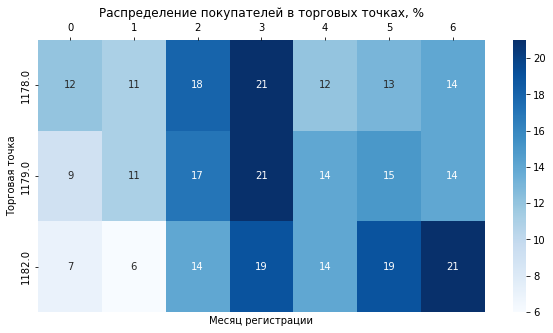

In [133]:
f,ax = plt.subplots(figsize=(10, 5))
ax.set_title('Распределение покупателей в торговых точках, %')
sns.heatmap(df_tt_mm_p, annot=True, fmt= 'g', cmap="Blues")
ax.xaxis.set_ticks_position('top')
ax.set_ylabel(ylabel = 'Торговая точка')
ax.set_xlabel(xlabel = 'Месяц регистрации')

В тт 1182 по сравнению с остальными больший процент покупателей с длительностью регистрации 5-8 месяцев, и именно в этой тт мы увидели положительный эффект от проведенной акции, а в остальных незначительный отрицательный эффект.

В тт 1178 и 1179 больший по сравнению с тт 1182 процент клиентов в сегментах до 5 месяцев, что, вероятно нивелировало положительный эффект от акции в их малочисленных сегментах покупателей с регистрацией 5 и больше месяцев. Это отразилось на результатах тестов, которые не показали отличий в тестовых и контрольных группах в обоих торговых точках.

Еще немного итогов:

- средняя покупка по всем покупателям в тестовой и контрольной группе:

In [213]:
r1 = df_clear[df_clear['id_group']=='control']['sum_pay'].mean()
r2 = df_clear[df_clear['id_group']=='test']['sum_pay'].mean()
r1, r2

(3325.1410029498525, 3460.840917298664)

 - средняя покупка по всем покупателям в тестовой и контрольной группе без учета тт 1199, 1188 и 1186:

In [215]:
r1 = df_clear_tt[df_clear_tt['id_group']=='control']['sum_pay'].mean()
r2 = df_clear_tt[df_clear_tt['id_group']=='test']['sum_pay'].mean()
r1, r2

(3318.3650385604114, 3415.857114427861)

- выручка в тестовой и контрольной группе без учета тт 1199, 1188 и 1186:

In [216]:
df_clear_tt.groupby('id_group')['sum_pay'].sum()

id_group
control    16780972.0
test       17164682.0
Name: sum_pay, dtype: float64

- выручка в тестовой и контрольной группе в тт 1199:

In [217]:
df_clear.loc[df_clear['id_point'] == 1199].groupby('id_group')['sum_pay'].sum()

id_group
test    1836135.0
Name: sum_pay, dtype: float64

- количество покупателей в тестовой и контрольной группе без учета тт 1199, 1188, 1186:

In [218]:
df_clear_tt.groupby('id_group')['id_client'].count()

id_group
control    5057
test       5025
Name: id_client, dtype: int64

In [82]:
df_clear.groupby('id_group')['id_client'].count()

id_group
control    5085
test       5538
Name: id_client, dtype: int64

In [220]:
df_clear.groupby('id_group')['sum_pay'].sum()

id_group
control    16908342.0
test       19166137.0
Name: sum_pay, dtype: float64

- количество покупателей не купивших ничего в тестовой и контрольной группах без учета тт 1199:

In [219]:
df_clear_tt.loc[df_clear_tt['sum_pay'] == 0].groupby('id_group')['id_client'].count()

id_group
control    25
test       25
Name: id_client, dtype: int64

In [216]:
df_resum_pre = df_clear.groupby(['id_group', 'id_point'])['sum_pay'].sum().reset_index()
df_resum_pre['sum_pay'] = df_resum_pre['sum_pay']/1000000

In [217]:
df_resum = df_resum_pre.pivot(index='id_group', columns='id_point', values='sum_pay').fillna(0)
df_resum.columns = ('1178', '1179', '1182', '1186', '1188', '1199')
df_resum.reset_index()

,id_group,1178,1179,1182,1186,1188,1199
0,control,7.208273,5.543763,4.028936,0.101360,0.026010,0.000000
1,test,6.954233,5.890156,4.320293,0.145536,0.019784,1.836135


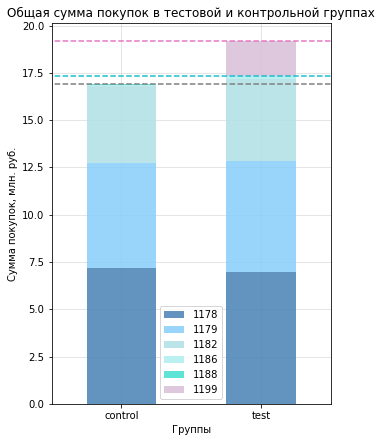

In [274]:
plt.rcParams["figure.figsize"] = (5, 7)
ax = df_resum.plot(kind='bar', stacked=True, rot = 'horizontal', color = ('steelblue', 'lightskyblue', 'powderblue', 'paleturquoise', 'turquoise', 'thistle'), alpha = 0.85)
ax.set_axisbelow(True)
plt.hlines(df_resum.loc['control'].sum(), -1, 2, colors = 'tab:grey', linestyles = 'dashed')
plt.hlines(df_resum.loc['test'].sum(), -1, 2, colors = 'tab:pink', linestyles = 'dashed')
plt.hlines(df_resum[['1178','1179', '1182', '1186', '1188']].loc['test'].sum(), -1, 2, colors = 'tab:cyan', linestyles = 'dashed')
ax.set_xlabel('Группы')
ax.set_ylabel('Сумма покупок, млн. руб.')
ax.set_title('Общая сумма покупок в тестовой и контрольной группах')
plt.grid(alpha = 0.4)
plt.show()

### Выводы:
    
1. Проведение акции в целом дало значительный эффект, увеличив среднюю покупку и общую выручку, однако при ближайшем рассмотрении оказалось, что большая часть разницы в выручке пришлась на тт 1199, в которой отсутствовала контрольная группа. Вероятно, проведение акции совпало с открытием торговой точки, поэтому контрольной группы здесь не могло быть.
2. В остальных торговых точках акция по-разному повлияла на покупки клиентов в разных сегментах по сроку регистрации в программе лояльности: у покупателей, зарегистрированные менее 5 месяцев, суммы покупок упали, у зарегистрированных 5 и дольше месяцев - выросли.

Рекомендация: проведение акции имеет смысл распространять на покупателей в зависимости от длительности их регистрации в программе лояльности, акцент делать на зарегистрированных 5-8 месяцев.